In [14]:
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
data_complete_df = pd.DataFrame(data_complete)


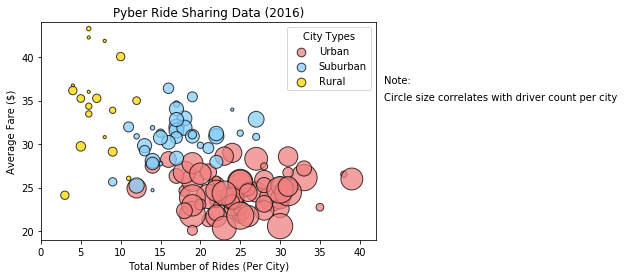

In [15]:
#Bubble Chart

#set up three separate data frames for each type

#selecting only the urban data
urban_sub = data_complete_df.loc[data_complete_df["type"]=="Urban"]
#calculating the average fare per city
urban_meanfare = urban_sub.groupby("city").mean()["fare"].reset_index()
#calculating the ride count per city
urban_countride = urban_sub.groupby("city").count()["ride_id"].reset_index()
#caluculating the driver count per city
urban_drivec = urban_sub.groupby("city").mean()["driver_count"].reset_index()
#first merge the average fares and the driver count of rides
urban_datamerge1 = pd.merge(urban_meanfare, urban_countride, how="left", on=["city", "city"])
#now merging that daataset with the driver count
urban_data = pd.merge(urban_datamerge1, urban_drivec, how="left", on=["city", "city"])

#do the same for suburban
suburban_sub = data_complete_df.loc[data_complete_df["type"]=="Suburban"]
suburban_meanfare = suburban_sub.groupby("city").mean()["fare"].reset_index()
suburban_countride = suburban_sub.groupby("city").count()["ride_id"].reset_index()
suburban_drivec = suburban_sub.groupby("city").mean()["driver_count"].reset_index()
suburban_datamerge1 = pd.merge(suburban_meanfare, suburban_countride, how="left", on=["city", "city"])
suburban_data = pd.merge(suburban_datamerge1, suburban_drivec, how="left", on=["city", "city"])

#do the same for rural
rural_sub = data_complete_df.loc[data_complete_df["type"]=="Rural"]
rural_meanfare = rural_sub.groupby("city").mean()["fare"].reset_index()
rural_countride = rural_sub.groupby("city").count()["ride_id"].reset_index()
rural_drivec = rural_sub.groupby("city").mean()["driver_count"].reset_index()
rural_datamerge1 = pd.merge(rural_meanfare, rural_countride, how="left", on=["city", "city"])
rural_data = pd.merge(rural_datamerge1, rural_drivec, how="left", on=["city", "city"])

#create the scatterplots for all three groups with the ride counts, the average fares, and the driver counts
# and the driver counts. set the color and other variables

urban_scatter = plt.scatter(urban_data['ride_id'], urban_data['fare'],
           urban_data['driver_count']*10, alpha=0.75, facecolor="lightcoral", edgecolors="black" )
suburban_scatter = plt.scatter(suburban_data['ride_id'], suburban_data['fare'],
           suburban_data['driver_count']*10, alpha=0.75,  facecolor="lightskyblue", edgecolors="black")
rural_scatter = plt.scatter(rural_data['ride_id'], rural_data['fare'],
           rural_data['driver_count']*10, alpha=0.75, facecolor="gold", edgecolors="black")

#create the legend
Pyber_legend = plt.legend((urban_scatter, suburban_scatter, rural_scatter), ("Urban", "Suburban", "Rural"),
          loc="upper right", title="City Types")
Pyber_legend.legendHandles[0]._sizes = [75]
Pyber_legend.legendHandles[1]._sizes = [75]
Pyber_legend.legendHandles[2]._sizes = [75]

#create the labels and notes
plt.xlim(0,42)
plt.ylim(19,44)
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(43, 37, 'Note: ')
plt.text(43, 35, 'Circle size correlates with driver count per city')
#show the chart
plt.show()


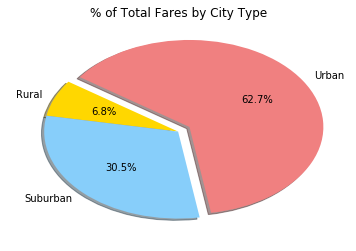

In [16]:
#First Pie Chart
#Total Fares by City Type

#calculate the sum of all fares
allfares = data_complete_df["fare"].sum()

#then group by type and calculate the average
city_fares = data_complete_df.groupby(["type"]).agg({'fare': 'sum'})
city_perc = round(city_fares["fare"]/allfares*100,1)
city_perc.reset_index()

# The colors and labels of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

# Separate the higher percentage section
explode = (0,0,.1)

#create the chart
pie_type = plt.pie(city_perc, colors=colors, labels = labels, explode = explode,
autopct="%1.1f%%", shadow=True, startangle=145)

#give it a title
plt.title('% of Total Fares by City Type')

plt.show()

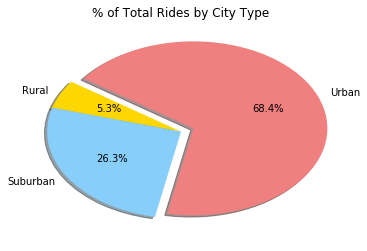

In [17]:
#Second Pie Chart
#Total Rides by City Type

#calculate the total of all rides
allrides = data_complete["ride_id"].count()

#then group by type and calculate the count and percentages
city_rides = data_complete.groupby(["type"]).agg({'ride_id': 'count'})
city_perc_r = round(city_rides["ride_id"]/allrides*100,1)
city_perc_r.reset_index()

#colors and labels
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
# Separate the higher percentage section
explode = (0,0,.1)
#create the chart
pie_type = plt.pie(city_perc_r, colors=colors, labels=labels, explode = explode,
autopct="%1.1f%%", shadow=True, startangle=145)

#title
plt.title('% of Total Rides by City Type')
plt.show()

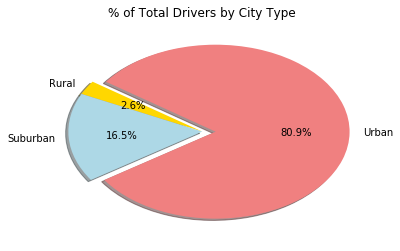

In [18]:

#Third Pie Chart
#Total Drivers by City Type

#calculate the total of all drivers
alldrives = data_complete_df.drop_duplicates(["city"])["driver_count"].sum()

#then group by type and calculate the sum and percentages
city_dr = data_complete_df.drop_duplicates(["city"]).groupby(["type"]).agg({'driver_count': 'sum'})
city_perc_d = round(city_dr["driver_count"]/alldrives*100,1)
city_perc_d.reset_index()

#colors and labels
colors = ["gold", "lightblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]

# Separate the higher percentage section
explode = (0,0,.1)

# create the chart
pie_type = plt.pie(city_perc_d, colors=colors, labels = labels, explode = explode,
autopct="%1.1f%%", shadow=True, startangle=145)

#title
plt.title('% of Total Drivers by City Type')
plt.show()
